# EDA

# 1. Retrieval 문서 데이터 살펴보기

In [1]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path  = "../../data/"
context_path = "wikipedia_documents.json"

with open(os.path.join(data_path, context_path), "r", encoding="utf-8") as f:
    wiki = json.load(f)

contexts = list(dict.fromkeys([v["text"] for v in wiki.values()]))
print('context len :', len(contexts))

context len : 56737


In [3]:
contexts[0]

'이 문서는 나라 목록이며, 전 세계 206개 나라의 각 현황과 주권 승인 정보를 개요 형태로 나열하고 있다.\n\n이 목록은 명료화를 위해 두 부분으로 나뉘어 있다.\n\n# 첫 번째 부분은 바티칸 시국과 팔레스타인을 포함하여 유엔 등 국제 기구에 가입되어 국제적인 승인을 널리 받았다고 여기는 195개 나라를 나열하고 있다.\n# 두 번째 부분은 일부 지역의 주권을 사실상 (데 팍토) 행사하고 있지만, 아직 국제적인 승인을 널리 받지 않았다고 여기는 11개 나라를 나열하고 있다.\n\n두 목록은 모두 가나다 순이다.\n\n일부 국가의 경우 국가로서의 자격에 논쟁의 여부가 있으며, 이 때문에 이러한 목록을 엮는 것은 매우 어렵고 논란이 생길 수 있는 과정이다. 이 목록을 구성하고 있는 국가를 선정하는 기준에 대한 정보는 "포함 기준" 단락을 통해 설명하였다. 나라에 대한 일반적인 정보는 "국가" 문서에서 설명하고 있다.'

In [4]:
contexts_length = [len(e) for e in contexts]
documents = pd.DataFrame(np.array([contexts, contexts_length]).T, columns=['context', 'len'])

In [5]:
documents['len']

0         454
1        2276
2        5068
3         601
4         465
         ... 
56732     612
56733     839
56734     307
56735     302
56736     391
Name: len, Length: 56737, dtype: object

In [6]:
pd.DataFrame(contexts_length)

,0
0,454
1,2276
2,5068
3,601
4,465
...,...
56732,612
56733,839
56734,307
56735,302


<AxesSubplot:>

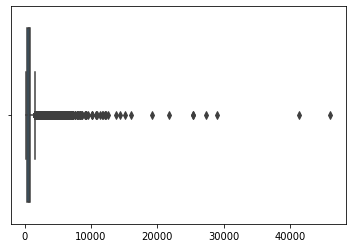

In [16]:
sns.boxplot(x=contexts_length)

## 1.1 토크나이징

토크나이저를 통한 단어의 갯수 빈도 보기


In [7]:
from transformers import AutoTokenizer

MODEL_NAME = "klue/roberta-large"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

In [8]:
encoded_sentence = tokenizer.encode(contexts[0])
tokenizer.decode(encoded_sentence)

'[CLS] 이 문서는 나라 목록이며, 전 세계 206개 나라의 각 현황과 주권 승인 정보를 개요 형태로 나열하고 있다. 이 목록은 명료화를 위해 두 부분으로 나뉘어 있다. # 첫 번째 부분은 바티칸 시국과 팔레스타인을 포함하여 유엔 등 국제 기구에 가입되어 국제적인 승인을 널리 받았다고 여기는 195개 나라를 나열하고 있다. # 두 번째 부분은 일부 지역의 주권을 사실상 ( 데 팍토 ) 행사하고 있지만, 아직 국제적인 승인을 널리 받지 않았다고 여기는 11개 나라를 나열하고 있다. 두 목록은 모두 가나다 순이다. 일부 국가의 경우 국가로서의 자격에 논쟁의 여부가 있으며, 이 때문에 이러한 목록을 엮는 것은 매우 어렵고 논란이 생길 수 있는 과정이다. 이 목록을 구성하고 있는 국가를 선정하는 기준에 대한 정보는 " 포함 기준 " 단락을 통해 설명하였다. 나라에 대한 일반적인 정보는 " 국가 " 문서에서 설명하고 있다. [SEP]'

In [9]:
len(tokenizer(contexts[3], padding=True, truncation=True, max_length=512)['input_ids'])

305

In [10]:
tokenizer.pad_token

'[PAD]'

In [11]:
tokenizer(contexts[0], padding=True, truncation=True, max_length=512)

{'input_ids': [0, 1504, 6953, 2259, 3779, 10188, 2052, 2307, 16, 1537, 3665, 21732, 2019, 3779, 2079, 544, 6994, 2145, 10356, 5887, 3766, 2138, 20245, 4337, 2200, 15346, 19521, 1513, 2062, 18, 1504, 10188, 2073, 17834, 2267, 2138, 3627, 864, 3884, 6233, 9928, 2051, 1513, 2062, 18, 7, 1656, 1141, 3135, 3884, 2073, 27209, 13026, 2145, 13865, 2069, 3954, 7488, 6125, 886, 3854, 5255, 2170, 4502, 2496, 2051, 3854, 31221, 5887, 2069, 7204, 1122, 2886, 4683, 3776, 2259, 6012, 2019, 3779, 2138, 15346, 19521, 1513, 2062, 18, 7, 864, 1141, 3135, 3884, 2073, 3951, 3634, 2079, 10356, 2069, 5761, 12, 842, 1827, 2386, 13, 3925, 19521, 1513, 3683, 16, 3919, 3854, 31221, 5887, 2069, 7204, 1122, 2118, 1380, 2886, 4683, 3776, 2259, 3718, 2019, 3779, 2138, 15346, 19521, 1513, 2062, 18, 864, 10188, 2073, 3702, 15519, 2062, 8066, 2062, 18, 3951, 3728, 2079, 3640, 3728, 2200, 2112, 2079, 5109, 2170, 6851, 2079, 4588, 2116, 1513, 4007, 16, 1504, 3624, 2170, 3839, 2470, 10188, 2069, 1430, 2259, 575, 2073, 423

encoded_sentence = [np.array(tokenizer.encode(contexts[i])) for i in range(len(contexts))]

In [17]:
np.array(encoded_sentence, dtype='object').shape

(225,)

# 2. MRC 데이터셋 살피기

In [18]:
from datasets import load_from_disk

dataset_dir = '../../data/train_dataset'
mrc = load_from_disk(dataset_dir)
mrc

DatasetDict({
    train: Dataset({
        features: ['__index_level_0__', 'answers', 'context', 'document_id', 'id', 'question', 'title'],
        num_rows: 3952
    })
    validation: Dataset({
        features: ['__index_level_0__', 'answers', 'context', 'document_id', 'id', 'question', 'title'],
        num_rows: 240
    })
})

## 2.1 타이틀의 종류

In [41]:
df_title = pd.Series(mrc['train']['title']).value_counts()
df_title

윤치호             43
장면              24
여운형             23
루트비히 비트겐슈타인     13
근대              13
                ..
대전 여고생 자살 사건     1
통계학              1
노스캐롤라이나 식민지      1
오노미치시            1
시논               1
Length: 2716, dtype: int64

In [77]:
answer_start = [e['answer_start'][0] for e in mrc['train']['answers']]
df_answer_start = pd.DataFrame(answer_start).value_counts()
df_answer_start

0       69
61      15
270     14
130     14
84      13
        ..
942      1
938      1
937      1
935      1
1974     1
Length: 1040, dtype: int64

In [79]:
df_answer = pd.Series(mrc['train']['answers'])#.value_counts()
df_answer

0               {'answer_start': [235], 'text': ['하원']}
1         {'answer_start': [212], 'text': ['《경영의 실제》']}
2               {'answer_start': [510], 'text': ['백성']}
3               {'answer_start': [625], 'text': ['중국']}
4                {'answer_start': [30], 'text': ['4개']}
                             ...                       
3947         {'answer_start': [317], 'text': ['지질 구조']}
3948           {'answer_start': [616], 'text': ['뉴저지']}
3949        {'answer_start': [255], 'text': ['칼 에케르트']}
3950        {'answer_start': [476], 'text': ['슬라브 신화']}
3951    {'answer_start': [189], 'text': ['크리스토포 알하우스']}
Length: 3952, dtype: object




answer의 위치

많이 사용된 document_id 순 정렬

Retreival이 잘되고 있는지 문서와 topk간의 비교

